# 1- VERI SETINE ILK BAKIS

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Veri Seti Hikayesi ve Yapisinin Incelenmesi

In [2]:
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [3]:
# Veri setinin hikayesi nedir?
df = planets.copy()
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
# Veri seti yapisal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [6]:
df.method = pd.Categorical(df.method)      #object olarak ifade edilen method sütununu category olarak degistiriyoruz.
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi 

In [7]:
df.shape

(1035, 6)

In [8]:
df.describe().T   # -> Transpoz halindeki describe fonksiyonu ; eksik bilgileri göz ardi eder ve kategorik degiskenleri disarida birakir

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Eksik Degerlerin Incelenmesi

In [9]:
# hic eksik gözlem/deger var mi?
df.isnull().values.any()

True

In [10]:
# hangi degiskenden kac tane var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
# eksik degerlerin 0 olarak doldurulmasi          # bu örnek üzerinde bunu yapmak gerekmez ama nasil yapildigini götermek icin yapildi
df['orbital_period'].fillna(0, inplace = True)    # bu kodu diger sütunlar icin de yapmak mümkün. Ama bunlari yaparken cok dikkatli olmak gerekir. 
df.isnull().sum()                                 # cünkü yapilacak olan cikarimlari direkt etkiler.

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [12]:
# eksik veirlerin ortalama deger ile doldurulmasi    # bu örnek üzerinde bunu yapmak gerekmez ama nasil yapildigini götermek icin yapildi
df['mass'].fillna(df.mass.mean(), inplace = True)    # bu kodu diger sütunlar icin de yapmak mümkün. Ama bunlari yaparken cok dikkatli olmak gerekir.
df.isnull().sum()                                    # cünkü yapilacak olan cikarimlari direkt etkiler.

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [13]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [14]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik Degisken Özetleri 

In [15]:
kat_df = df.select_dtypes(include = ['object'])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## Kategorik Degiskenin Siniflarina ve Sinif Sayisina Erismek

In [16]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [17]:
kat_df['method'].value_counts().count()    # yukaridaki kategorik sinif sayisini (frekansina) sayar

10

## Kategorik Degiskenin Siniflarinin Frekanslarina Erismek

In [18]:
kat_df['method'].value_counts()   # yukaridaki siniflardan hangisinde kac tane olduguna bakar

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

<Axes: ylabel='method'>

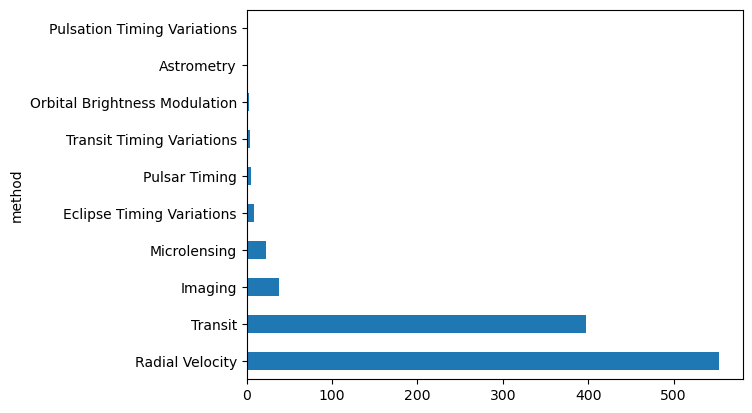

In [19]:
df['method'].value_counts().plot.barh()    # method kategorik degiskenin icindeki siniflari sayar. Bu grafik pandas ile olusur.

## Sürekli Degisken Özetleri

In [20]:
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [21]:
df_num.describe().T   # bu kod bütün veri setindeki numerik verileri gösterir

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [22]:
df_num['distance'].describe().T   #bu kod distance sütunundaki numeric verileri gösterir

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [23]:
print('Ortalama: ' + str(df_num['distance'].mean()))
print('Dolu Gözlem Sayisi: ' + str(df_num['distance'].count()))
print('Maksimum Deger: ' + str(df_num['distance'].max()))
print('Minimum Deger: ' + str(df_num['distance'].min()))
print('Medyan: ' + str(df_num['distance'].median()))
print('Standart Sapma: ' + str(df_num['distance'].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayisi: 808
Maksimum Deger: 8500.0
Minimum Deger: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


# 2- DAGILIM GRAFIKLERI (barplot, catplot, histogram, yogunluk)

## Barplot (Sütun Grafik) -> Kategorik verileri görsellestirmek icin kulllanilir

Veri Seti Hikayesi

price : dolar cinsinde fiyat (326 - 18,823)

carat : agirlik (0.2 - 5.01)

cut   : kalite (Fair, Good, Very Good, Premium, Ideal)

color : renk (from J (worst) to D (best))

clarity: temiyligi, berrakligi (i1, (worst), Si2, Si1, VS2, VS1, VVS2, VVS1, IF (best))

x: lenght in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth : toplam derinlik yüzdesi = z / mean(x,y) = 2*z/(x+y)(43-79)

table : elmasin en genis noktasina göre genisligi (43 - 95)

## Veri Setine Ilk Bakis

In [24]:
import seaborn as sns

In [25]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [28]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [29]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

* ordinal veri tanimlama

In [30]:
from pandas.api.types import CategoricalDtype

In [31]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [32]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [33]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [34]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [35]:
cut_kategoriler = ['Fair','Good','Very Good','Premium','Ideal']

In [36]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [37]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

* Barplot 

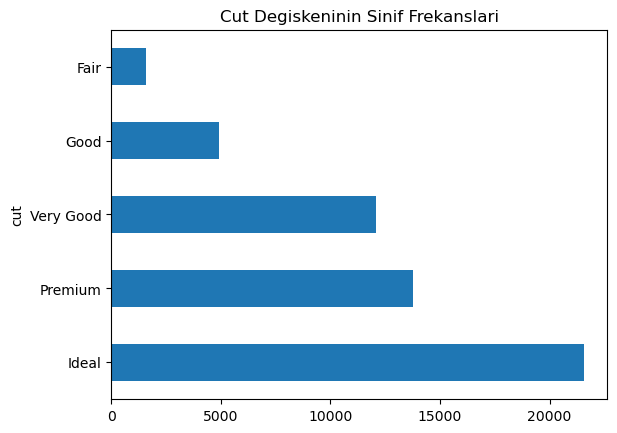

In [38]:
df['cut'].value_counts().plot.barh().set_title('Cut Degiskeninin Sinif Frekanslari');  #Pandas görsellestirmesi

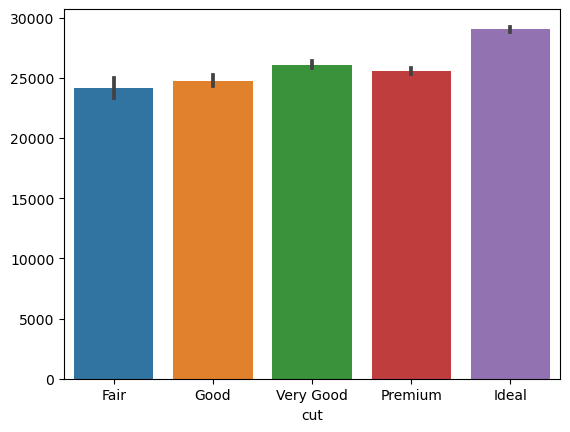

In [39]:
sns.barplot(x = 'cut', y = df.cut.index , data = df);   #Seaborn görsellestirmesi

## Caprazlamalar

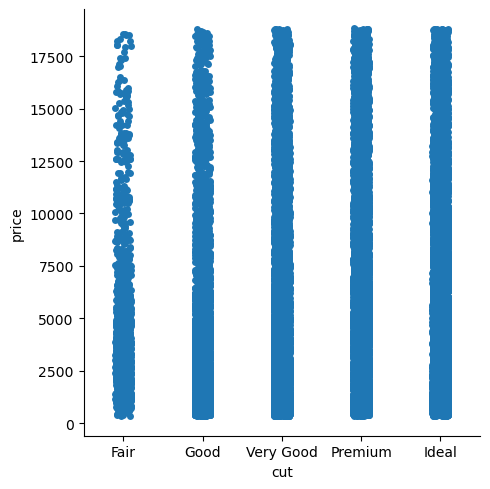

In [40]:
sns.catplot(x = 'cut', y = 'price', data = df);

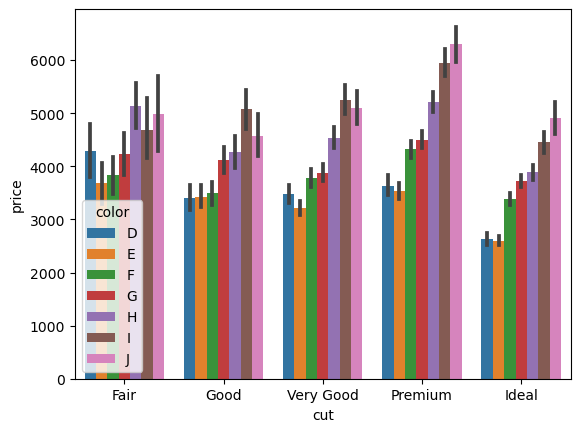

In [41]:
sns.barplot(x = 'cut', y = 'price', hue = 'color', data = df);

yukarida y-eksenindeki araliklar ilk veri setindeki fiyat araliklarindan farklidir. cünkü seaborn, hue (renklendirme) fonksiyonunun 
kullanimiyla arka planda daha iyi görsellestirmek adina bir toplulastirma islemi yapip , temsil edecek sekilde degerler olusturdu. 
Bunun dogru yapilip yapilmadigini dogrulamak icin asagida bunun saglamasini yapalim.

In [42]:
df.groupby(['cut','color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yogunluk

In [43]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

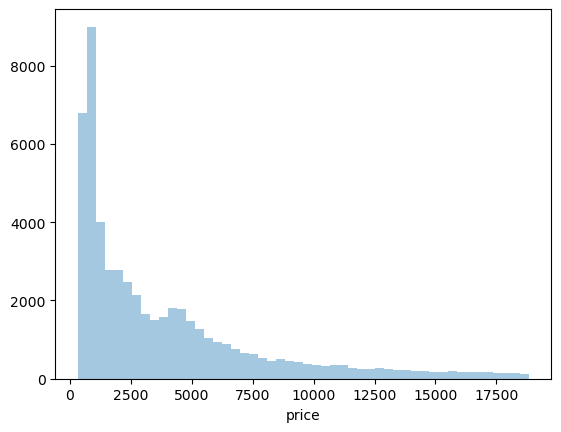

In [44]:
sns.distplot(df.price , kde = False);

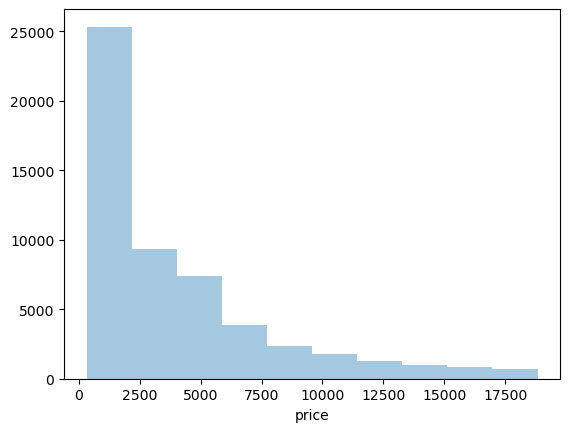

In [45]:
sns.distplot(df.price, bins = 10, kde = False);

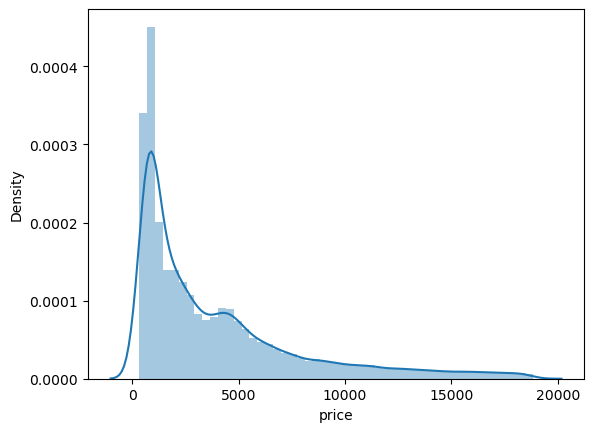

In [46]:
sns.distplot(df.price);   # histogram + yogunluk grafigi

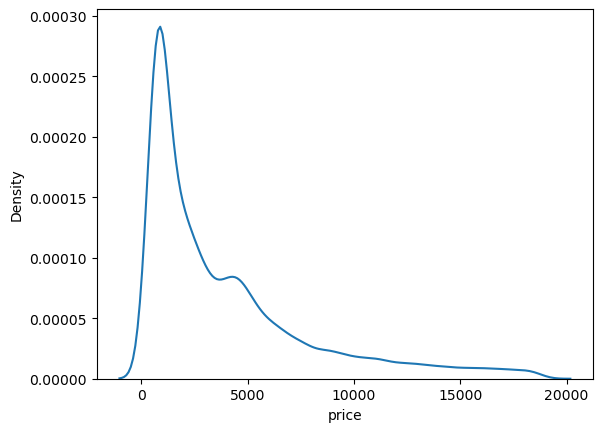

In [47]:
sns.distplot(df.price, hist = False);   # yogunluk grafigi

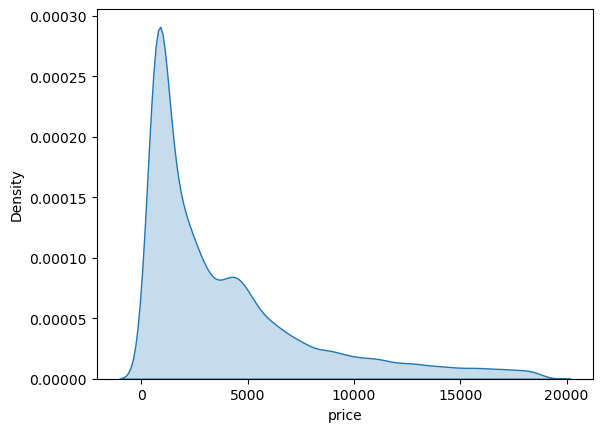

In [48]:
sns.kdeplot(df.price, shade = True);

## Caprazlamalar 

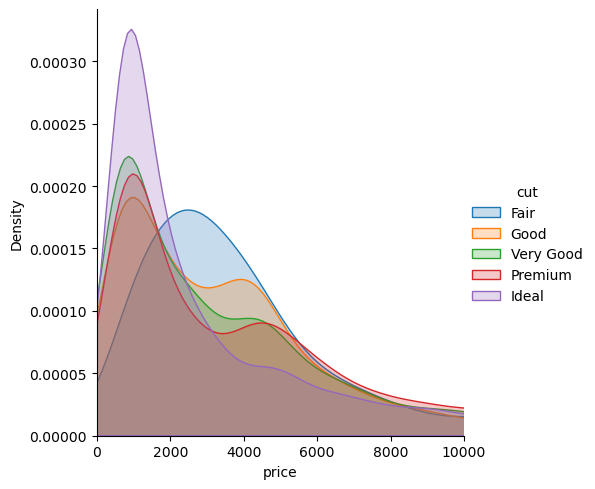

In [49]:
(sns
 .FacetGrid(df,                            # -> grafik üzerine eklenen boyutlari bölerek gösterir
               hue = 'cut',                # -> boyut eklemek icin kullanilir. Burada 'cut' sütununu boyut olarak ekler
               height = 5,                 # yükseklik parametresini ekler
               xlim = (0, 10000))          # x ekseninde hangi deger araligindaki verileri görmek istedigini belirtir
 .map(sns.kdeplot, 'price', fill = True)   # 'cut' kategorik degiskeninin siniflarini 'price' ile caprazlamak icin boyut olarak ekler
 .add_legend()                             # -> cut sütununun bilgilerini ekler
);

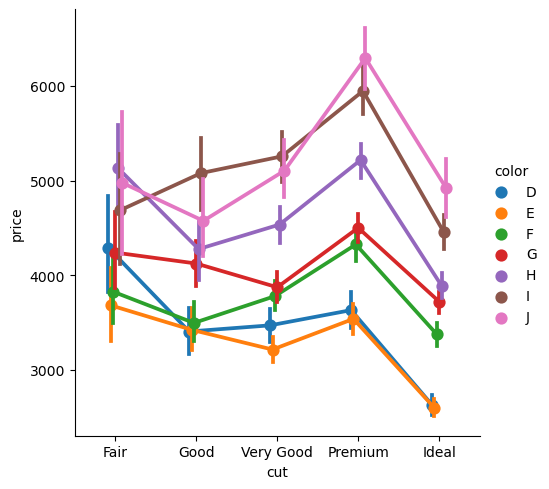

In [50]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df, dodge=True);

# 3- BOXPLOT (Kutu Grafik)

*Veri Seti Hikayesi

total_bill: yemegin toplam fiyati (bahsis ve vergi dahil)

tip: bahsis

sex: ücreti ödeyen kisinin cinsiyeti (0= male, 1= female)

smoker: grupta sigara icen var mi? (0= No, 1= Yes)

day: gün(3= Thur, 4= Fri, 5= Sat, 6= Sun)

time: Ne zaman? (0= Day, 1= Night)

size: grupta kac kisi var?

## Veri setine ilk bakis

In [51]:
import seaborn as sns

In [52]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [55]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [56]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [57]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [58]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

## Boxplot (Kutu Grafigi) olusturulmasi

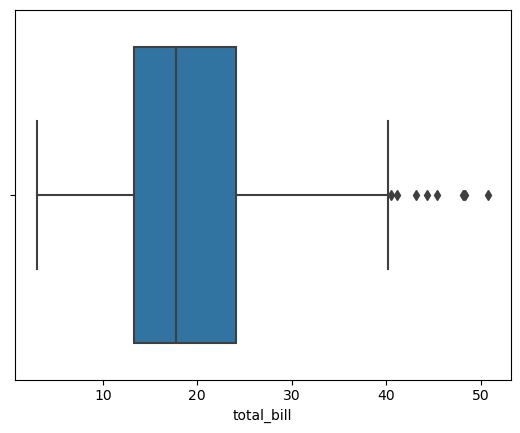

In [59]:
sns.boxplot(x = df['total_bill']);

## Kutu Grafik (Box Plot) Caprazlamalar

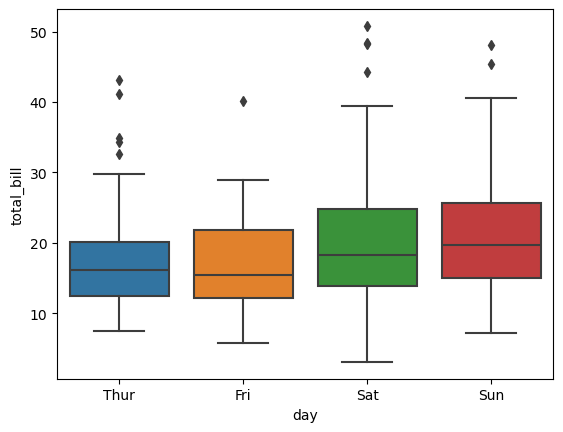

In [60]:
#Hangi günler daha fazla/az kazaniyoruz? 
sns.boxplot(x = 'day', y = 'total_bill', data = df);

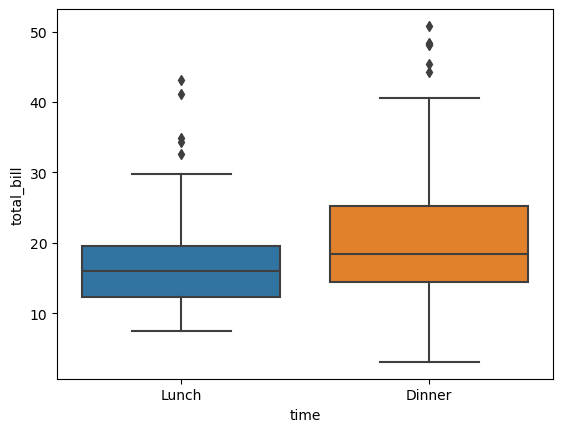

In [61]:
#Sabah mi yoksa aksam mi daha fazla/az kazaniyoruz?
sns.boxplot(x = 'time', y = 'total_bill', data = df);

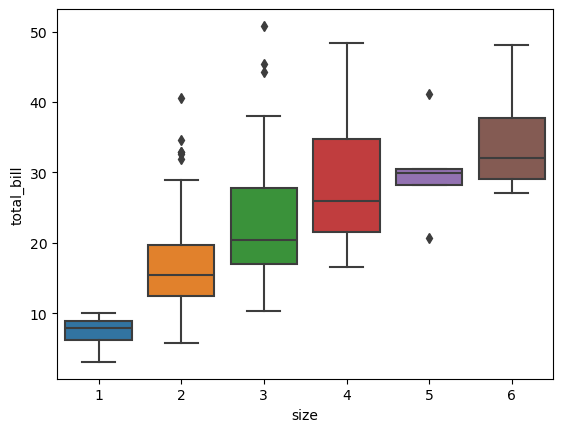

In [62]:
#Kisi sayisinin kazanc degeri
sns.boxplot(x = 'size', y = 'total_bill', data = df);

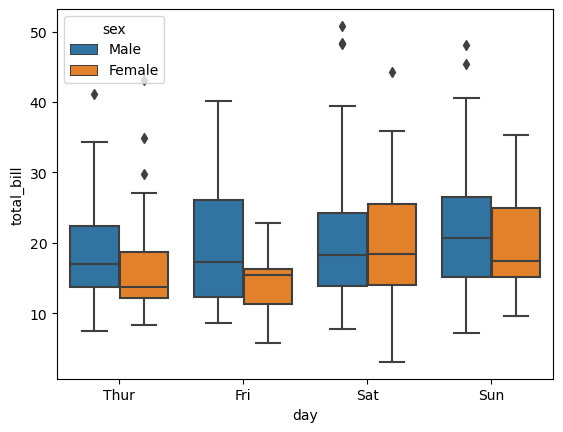

In [63]:
#Hangi günlerde hangi cinsiyet daha fazla/az kazandiriyor?
sns.boxplot(x = 'day', y = 'total_bill', hue = 'sex', data = df);

## Violin Plot 

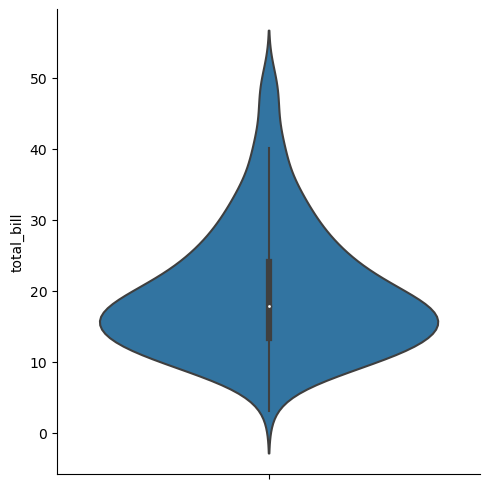

In [64]:
sns.catplot(y = 'total_bill', kind = 'violin', data = df );

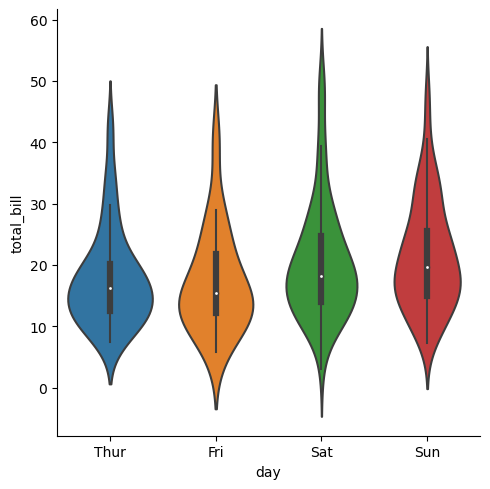

In [65]:
#Violin Grafik Caprazlamalar (boyut eklemek)
sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', data = df );

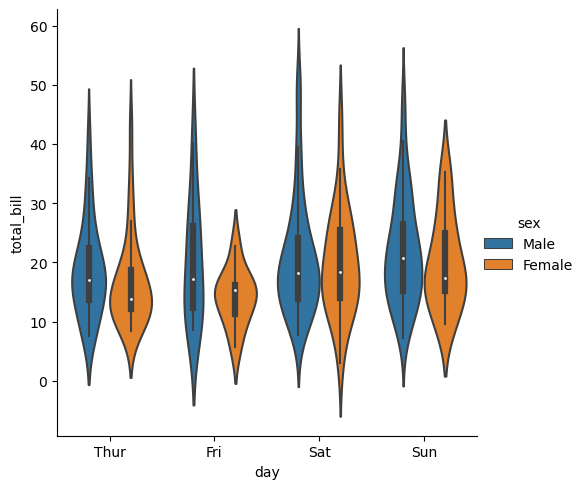

In [66]:
sns.catplot(x = 'day', y = 'total_bill', hue= 'sex', kind = 'violin', data = df );

## Korelasyon Grafikleri / Sacilim Grafikleri (scatterplot) 

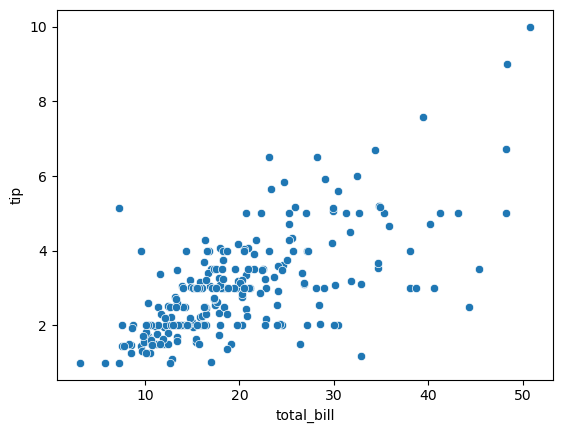

In [67]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df);

## Korelasyon Caprazlamalar

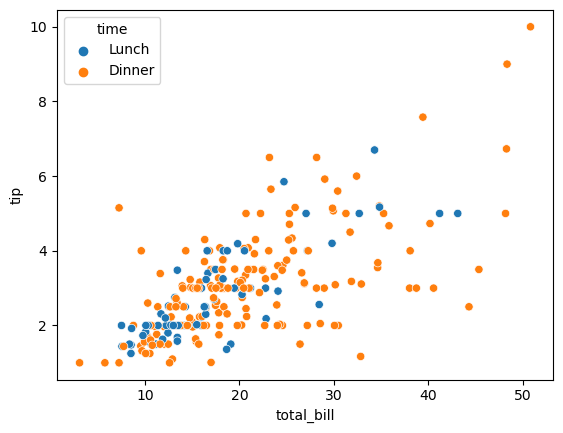

In [68]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue= 'time', data = df);

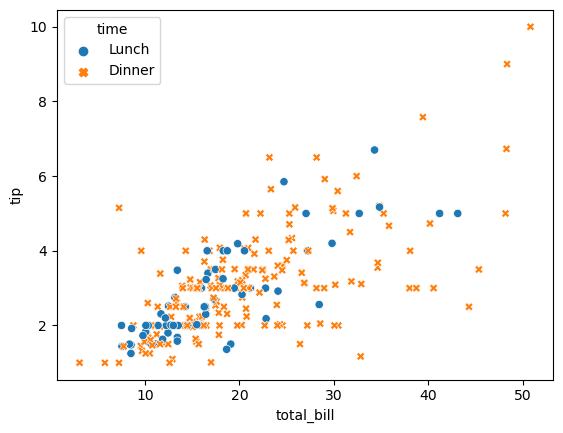

In [69]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'time', style = 'time', data = df);

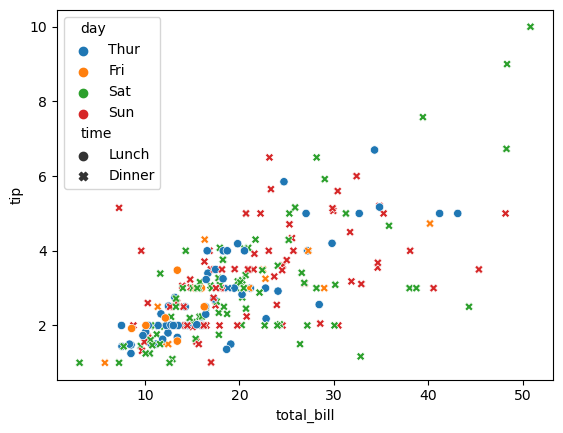

In [70]:
# size ve style argümanlari ücüncü boyut olarak kategorik degiskenleri grafige ekler
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'day', style = 'time', data = df);

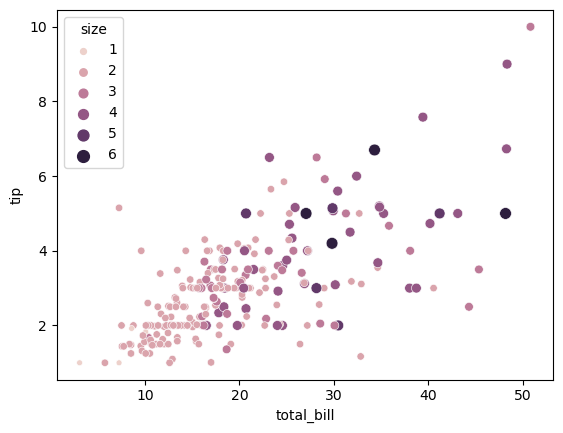

In [71]:
# size argümani sayisal bir degiskeni grafige ücüncü boyut olarak ekler
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'size', size = 'size', data = df);   

## Dogrusal Iliskinin Gösterilmesi (lmplot)

In [72]:
import matplotlib.pyplot as plt

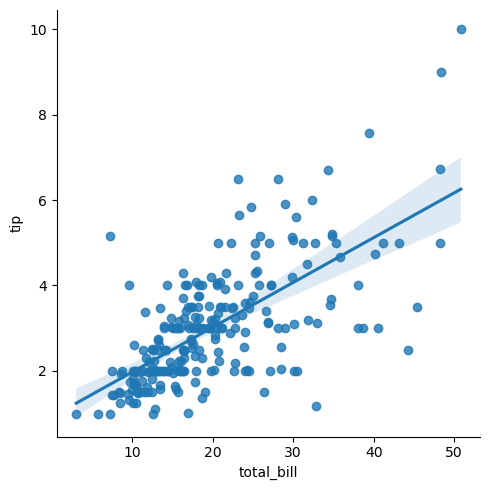

In [73]:
sns.lmplot(x = 'total_bill', y = 'tip', data = df);

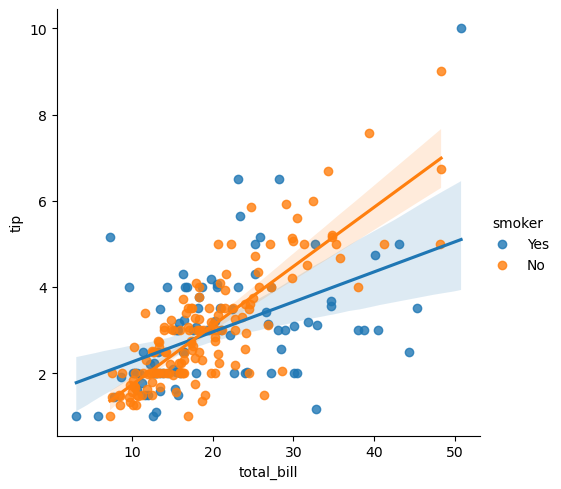

In [74]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = df);

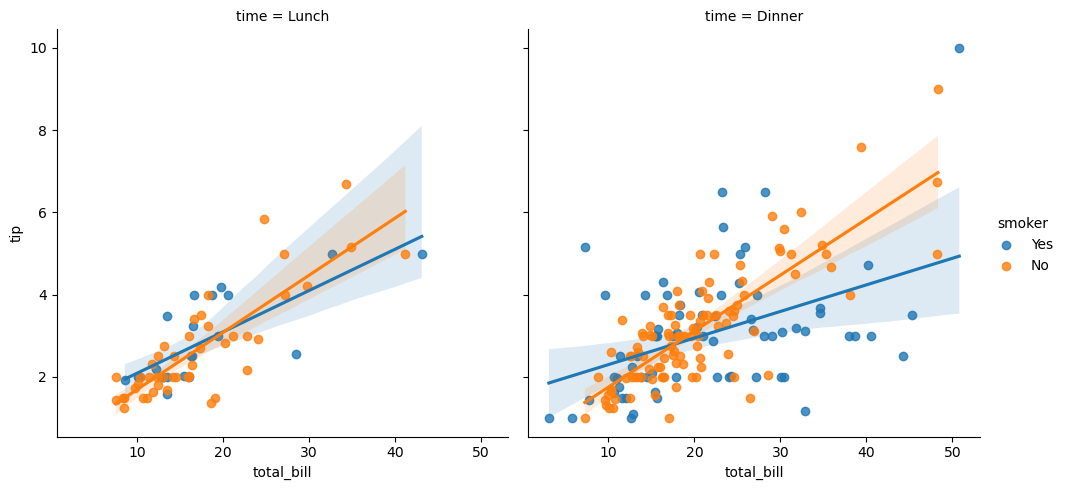

In [75]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = df);

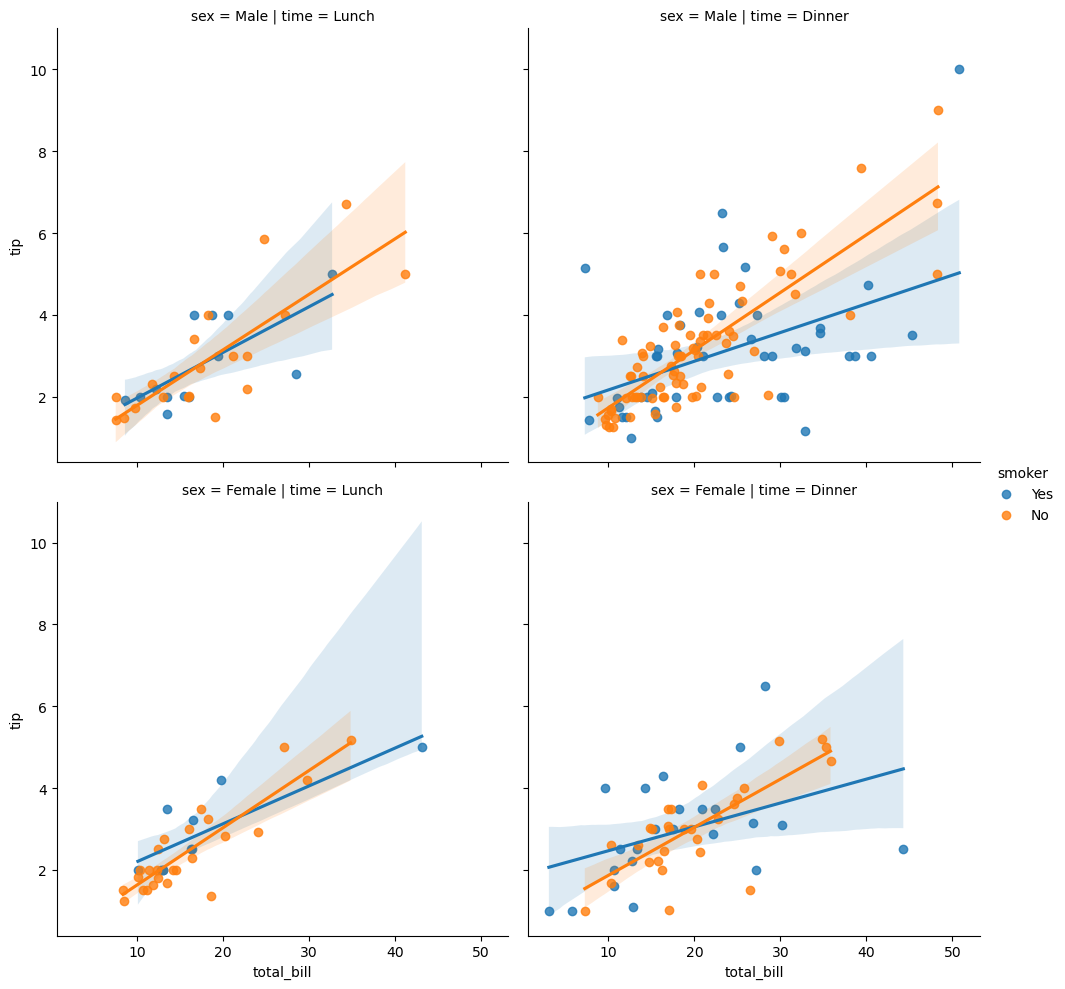

In [76]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', row = 'sex', data = df);

# 4- SCATTERPLOT MATRISI (Nokta-Sacilim Grafikleri)

In [77]:
import seaborn as sns

In [78]:
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


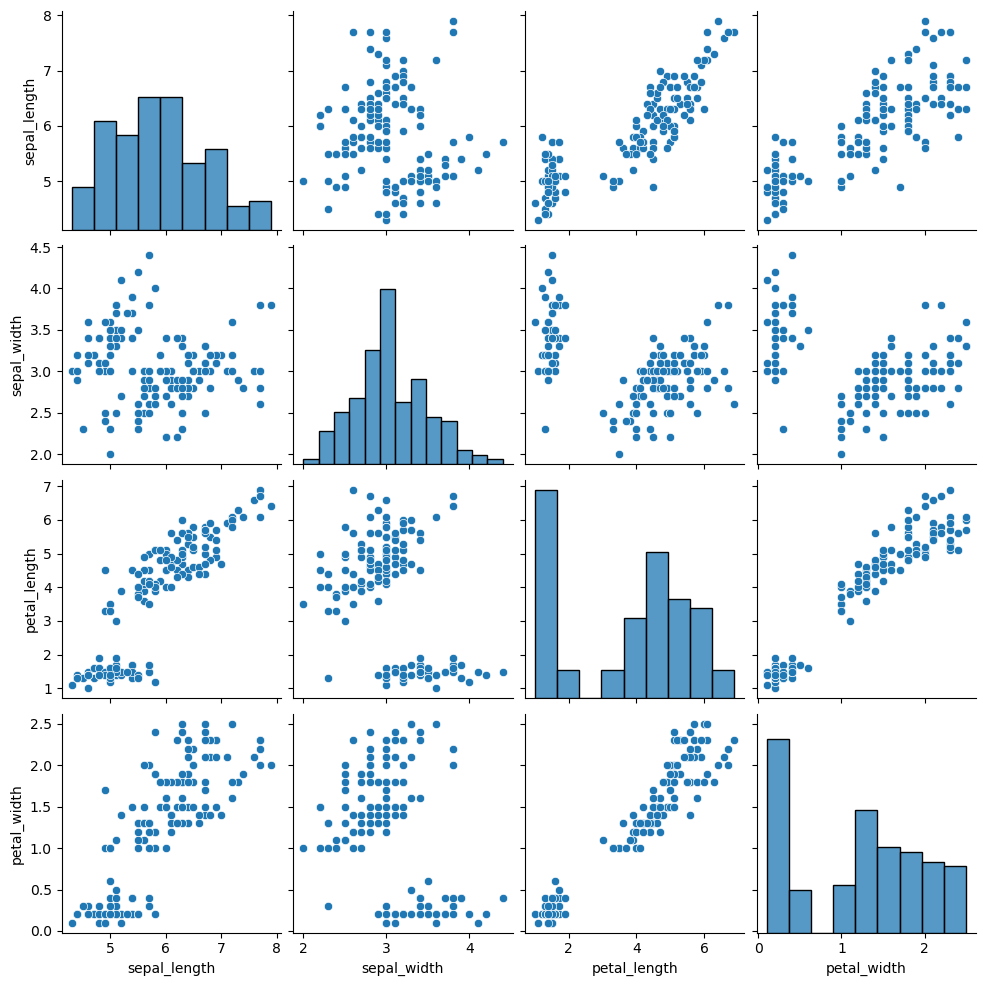

In [82]:
sns.pairplot(df);

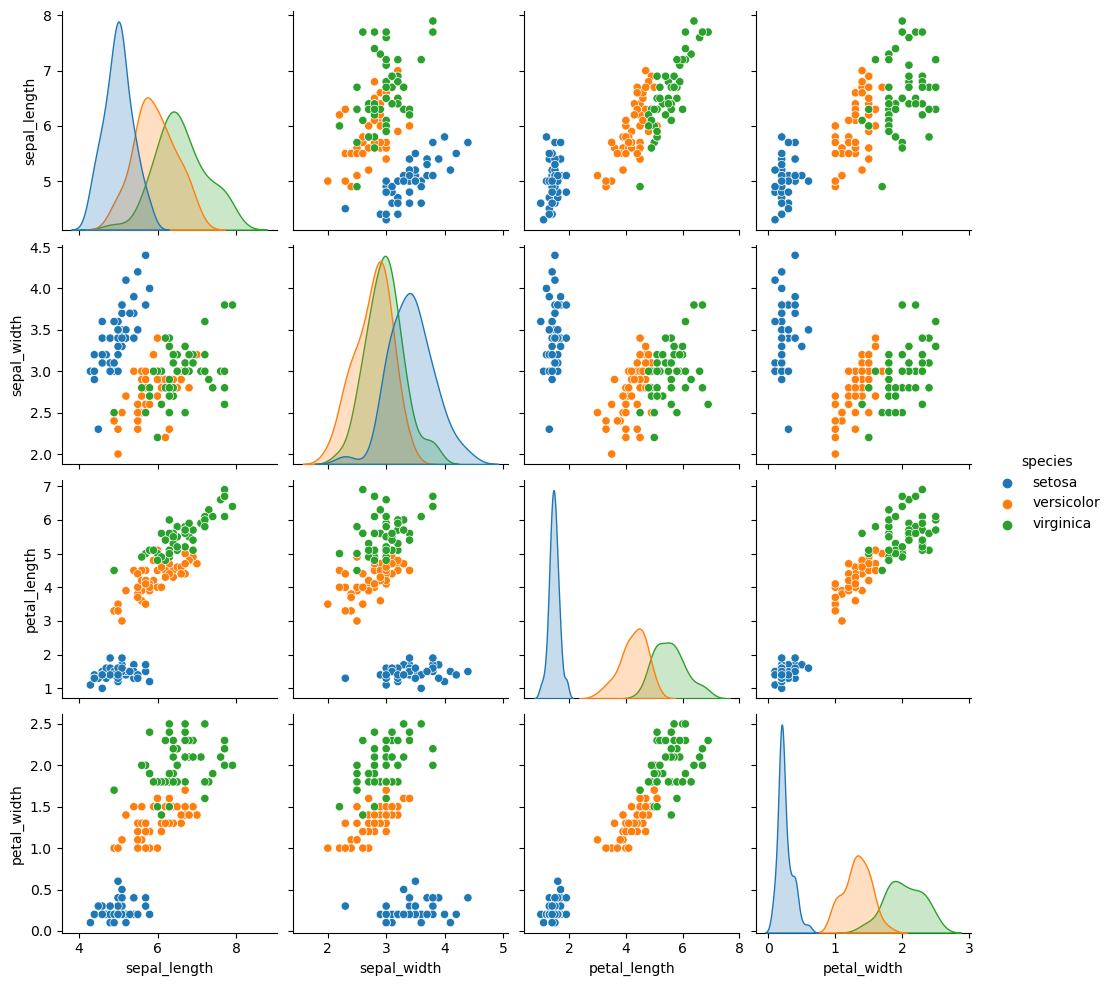

In [83]:
sns.pairplot(df, hue = 'species');

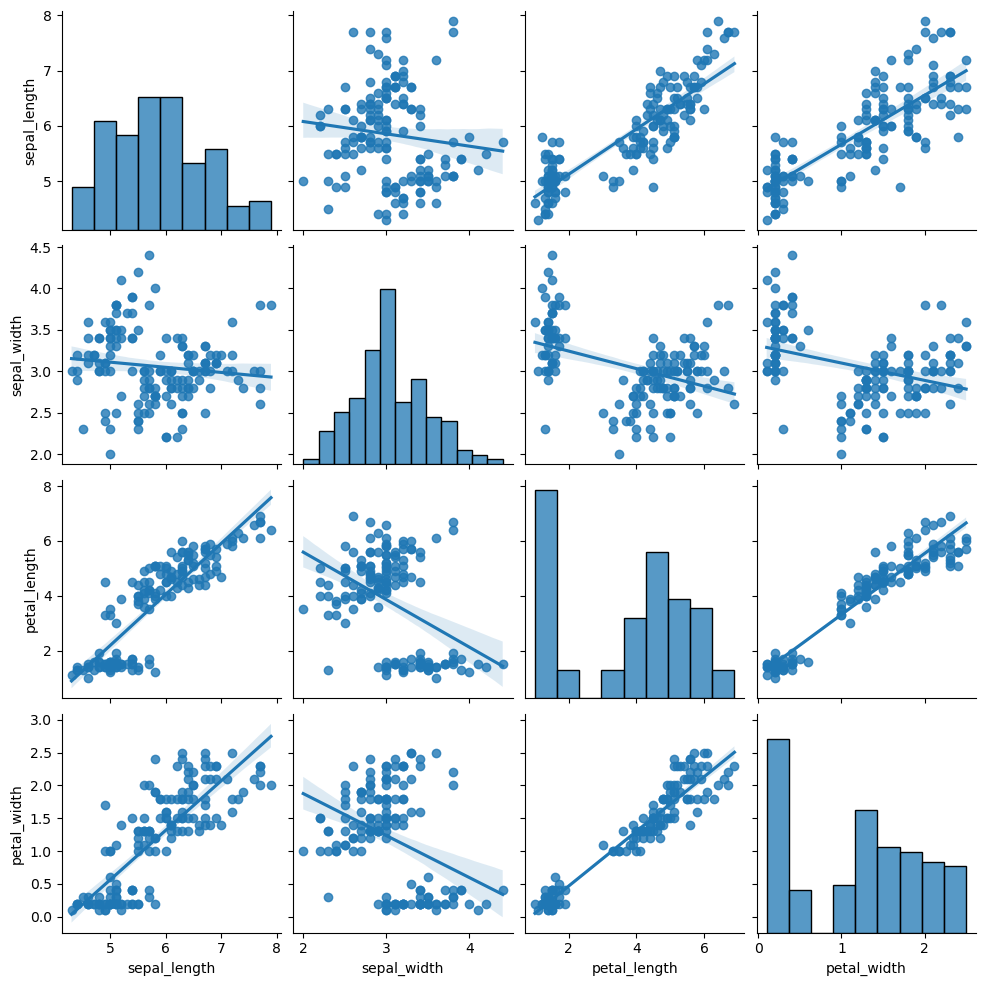

In [84]:
sns.pairplot(df, kind = 'reg');

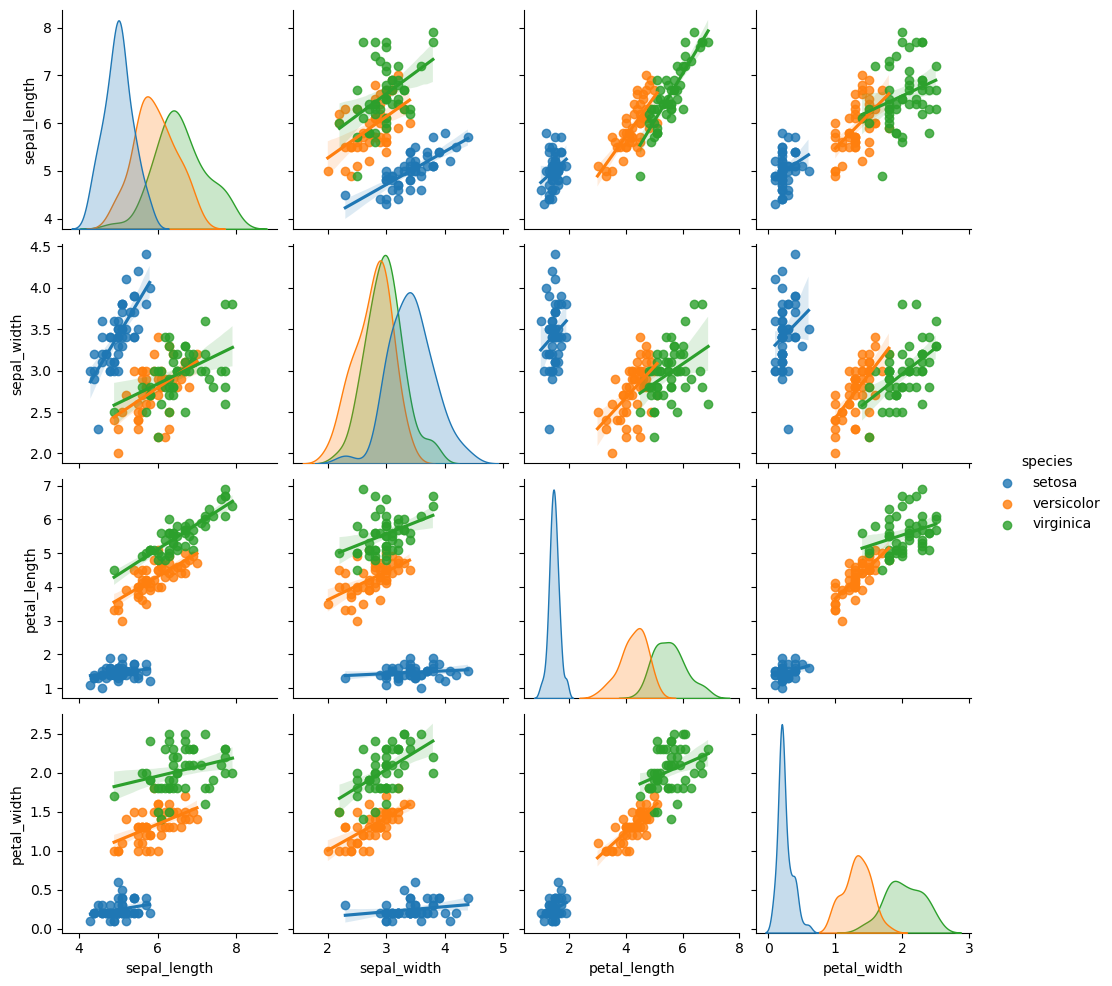

In [85]:
sns.pairplot(df, kind = 'reg', hue = 'species');

# 5- HEAT MAP (Isi Haritasi)

> Zamana bagli veri setlerinde siklikla kullanilir.

In [86]:
import seaborn as sns

In [87]:
flights = sns.load_dataset('flights')
df = flights.copy()

In [88]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


> heatmap() fonksiyonu bizim elimizdeki veri setini grafige dönüstürebilmek icin daha yapisal formda olmasini bekler.
örnegin; yillar ve aylar farkli eksenlerde olacak sekilde boyutlandirirsak daha kullanilabilir bir formda göstermis oluruz.
bunu da pivot() fonksiyonu ile yapabiliriz 

In [91]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [92]:
df = df.pivot(index='month', columns='year', values='passengers')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


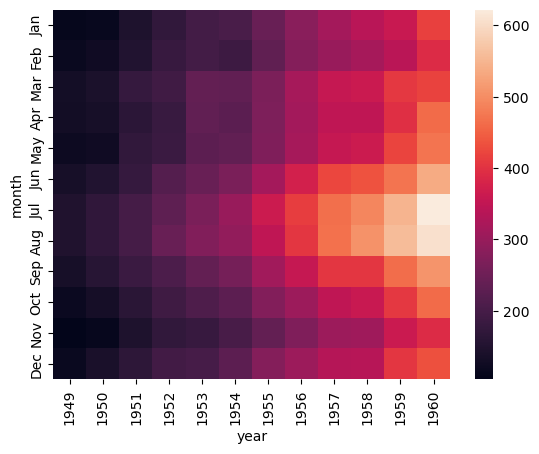

In [93]:
sns.heatmap(df);

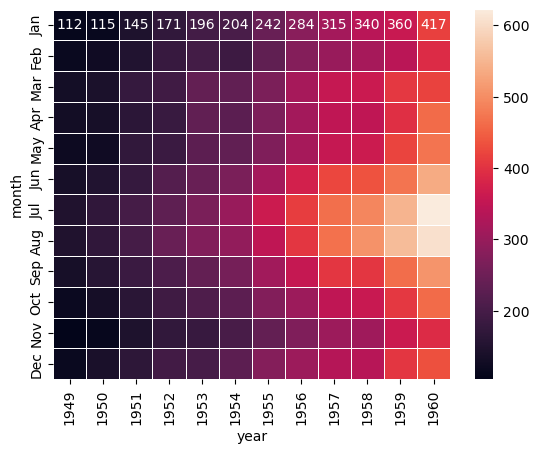

In [94]:
sns.heatmap(df, annot = True, fmt = 'd', linewidths = 0.5);

# 6- LINE PLOT (Cizgi Grafik)

> Zamana bagli degiskenlerin oldugu veri setlerinde ve nesnelerin interneti (IoT) gibi senaryolarda siklikla kullanilir

## Veri Serini Yorumlama

In [95]:
import seaborn as sns

In [96]:
fmri = sns.load_dataset('fmri')
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [97]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


> burada amacimiz; her bir zaman noktasina (Timepoint) göre Signal'in durumunu gözlemlemek olsun. Sonrasinda caprazlama yöntemi ile diger verileri de grafige ekleyelim.

In [100]:
df['timepoint'].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [101]:
df['signal'].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [102]:
# yukaridaki verilerden yapilan yorumlarin dogrulugunu saglamak icin ;
df.groupby('timepoint')['signal'].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [103]:
# yukaridaki verilerden yapilan yorumlarin dogrulugunu saglamak icin ;
df.groupby('signal').count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [104]:
df.groupby('timepoint')['signal'].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Cizgi Grafik ve Caprazlamalar

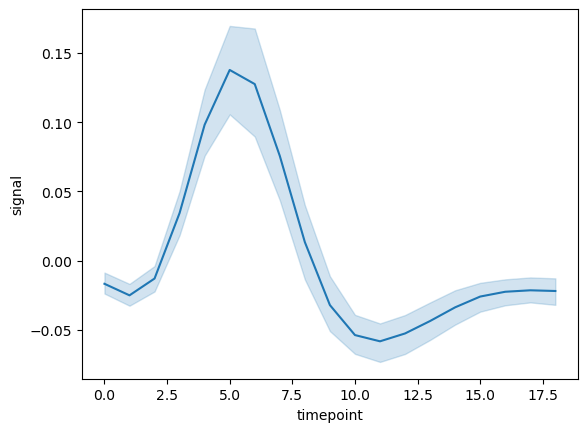

In [105]:
sns.lineplot(x = 'timepoint', y = 'signal', data = df);

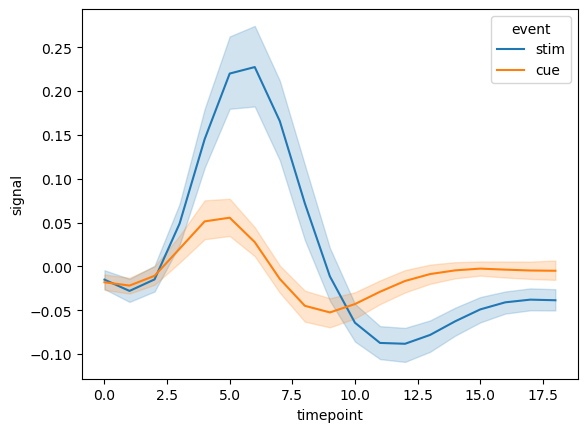

In [106]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data = df);

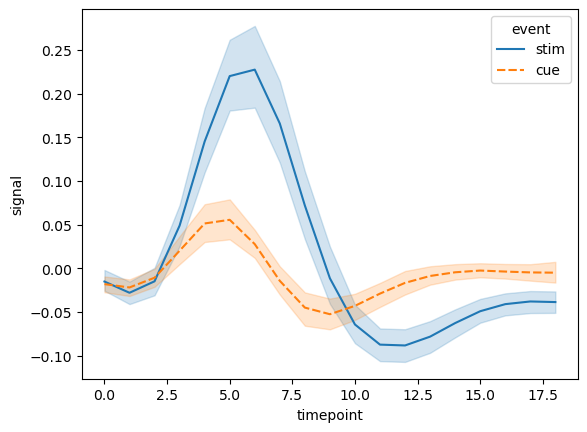

In [107]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', data = df);

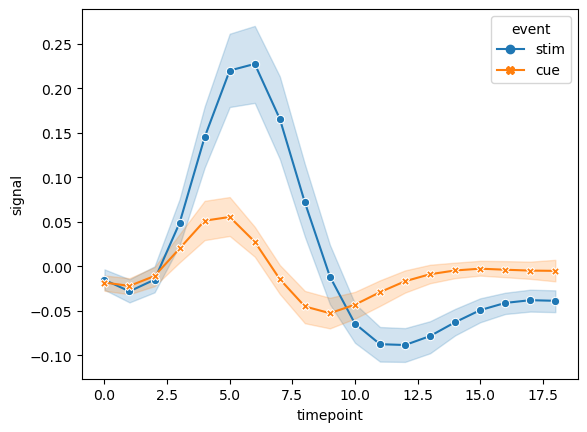

In [108]:
sns.lineplot(x = 'timepoint', 
             y = 'signal', 
             hue = 'event', 
             style = 'event', 
             markers = True, 
             dashes = False, 
             data = df);

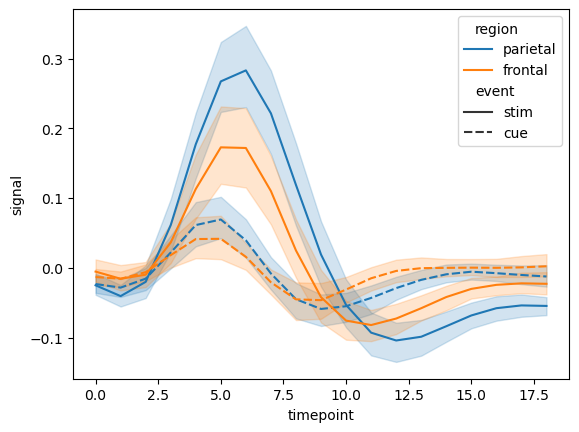

In [109]:
sns.lineplot(x = 'timepoint', 
             y = 'signal', 
             hue = 'region', 
             style = 'event', 
             data = df);

# 7- BASIT ZAMAN SERISI GRAFIGI

In [110]:
!pip install pandas_datareader
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


ModuleNotFoundError: No module named 'yfinance'

> Apple firmasinin borsadaki zamana bagli hisse senedi degerleri veri setini degerlendiriyoruz.

In [ ]:
df = yf.download('AAPL', start='2016-01-01', end='2019-08-25')
df.head()

> yukarida bircok farkli framework import etmemin sebebi, üzerinde islem yapmak istedigim AAPL veri setini indirebilmek icindi. normalde !pip install pandas_datareader
import pandas as pd
import pandas_datareader as pdr 
seklinde import edebilirken , bunu denedigimde hata ciktisi aldigim icin farkli bir sekilde import etmek zorunda kaldim. Bu yüzden ; 
import yfinance as yf 
yaptim.

In [ ]:
kapanis = df['Close']
kapanis.head()

In [ ]:
kapanis.plot();

In [ ]:
kapanis.index      

In [ ]:
#bazen yukaridaki komut hata verebiliyor. Böyle bir durumda su sekilde düzeltme yapabiliriz;
kapanis.index = pd.DatetimeIndex(kapanis.index)
kapanis.head()